<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today I will give you a brief introduction to the area of statistics and the python programming language.

*Probabilistic Graphical Models(PGM) are a very solid way of representing joint probability distributions on a set of random variables.*

$\mathrm P(A\mid B) = \frac{P(B \mid A) P(A)}{P(B)} $ see [the wikipedia page](https://en.wikipedia.org/wiki/Bayes%27_theorem).

In this tutorial I will show how can test and use *Probabilistic Graphical Models* for the most basic problem the coin problem.

*The coin is flip again and again for 100 times.

If it was the head I have one event if not is another event.*

In other words, after each flip you would update the prior probability distribution to obtain the posterior probability distribution.

You can use the [pgmpy](https://pgmpy.org/)  python framework to work with these types of graph models.

Let's install it with **pip** tool.

In [542]:
!pip install pgmpy

These python modules are used for generate fata and show graphs.

In [543]:
import numpy as np
import pandas as pd
import networkx as nx

Create bayesian model from **pgmpy.models** and use it is easy.

Let's create this model:

In [544]:
from pgmpy.models import BayesianModel
Gmodel_coin = BayesianModel()

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  FutureWarning,


A **node** is associated with a probability function that takes, as input, a particular set of values for the node's parent variables, and gives (as output) the probability (or probability distribution, if applicable) of the variable represented by the node.

*... because I have just one coin then I need just one node.*

Let's create node:

In [545]:
Gmodel_coin.add_node('coin')

The next source code will help me to see how I create.
See also the source code comments:

The BayesianModel with 1 nodes and 0 edges
[0 1]
[1 2 0]
    coin
0      0
1      0
2      0
3      0
4      1
..   ...
95     0
96     0
97     0
98     1
99     1

[100 rows x 1 columns]


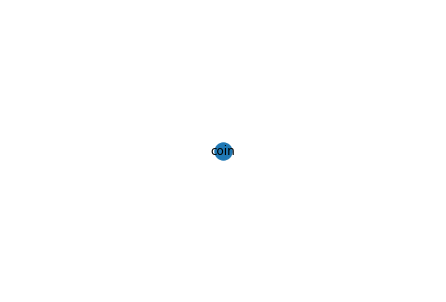

In [546]:
# print the model structure
print("The " + str(Gmodel_coin))
# print the random between 0 and 1
print(np.random.randint(low=0, high=2, size=(2)))
# this will print three values: 0, 1 or 2
print(np.random.randint(low=0, high=3, size=(3)))
# generate random data and add it to a variable data_coin for each flip coint events, 1 is head , 0 is not !
data_coin = pd.DataFrame(np.random.randint(low=0, high=2, size=(100, 1)), columns=['coin'])
# print the data_coin 
print(data_coin)
# draw the graph with the nx python module
nx.draw(Gmodel_coin, with_labels=True)

The **BayesianEstimator** method to estimate the *CPD* for a given variable ,and can be used with the **fit** method with this. 

In this case need to set the *prior_type* in order to quantifies how much the other chosen prior has impacted on the outcome as compared to a data-only posterior.

The joint probability of the head and the loaded coin is 0.5
... see the result of the CPD.

In [547]:
from pgmpy.estimators import BayesianEstimator

Gmodel_coin.fit(data_coin, estimator=BayesianEstimator, prior_type="BDeu")

for cpd in Gmodel_coin.get_cpds():
    print(cpd)

+---------+---------+
| coin(0) | 0.37619 |
+---------+---------+
| coin(1) | 0.62381 |
+---------+---------+


Edges represent a static causal probabilistic dependence.

You need to create another model with  BayesianModel function, **if not then you will have the same model and the new node will be added to the base mode coin:**

The BayesianModel with 2 nodes and 1 edges


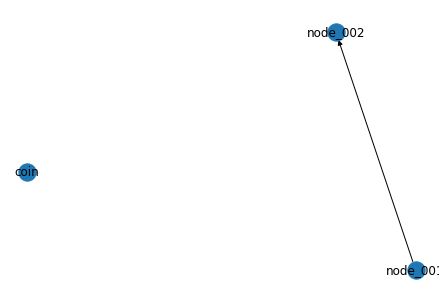

In [548]:
Gmodel_coin.add_edge('node_001', 'node_002')
# draw the graph with the nx python module
nx.draw(Gmodel_coin, with_labels=True)
# print the model structure
print("The " + str(Gmodel_001))

*If I used two coins then the first source code can be changed ...*

Let's create a new Gmodel_001 BayesianModel model and add two nodea and one edge between these:

In [549]:
from pgmpy.models import BayesianModel
Gmodel_001 = BayesianModel()
Gmodel_001.add_edge('node_001', 'node_002')

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  FutureWarning,


The BayesianModel with 2 nodes and 1 edges
Number of nodes in the Gmodel_001 is : 2


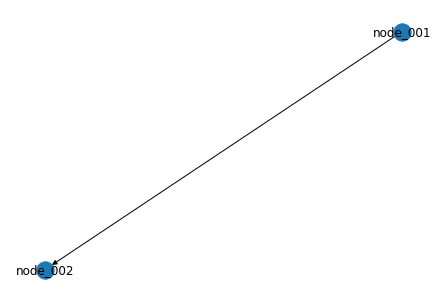

In [550]:
# print the model structure
print("The " + str(Gmodel_001))
# print the number of nodes
print("Number of nodes in the Gmodel_001 is : " +str(len(Gmodel_001)))
# draw the graph with the nx python module
nx.draw(Gmodel_001, with_labels=True)

*About weights, this is the conditional probability of the event at the end of the edge happening given that all the events before that edge have occurred.*

Let's print some infos about the edges and make some settings when draw the graph of Gmodel_001 with the values of colors and weights.

[('node_001', 'node_002')]
[('node_001', 'node_002', {'weight': 0.1, 'color': 'green'})]


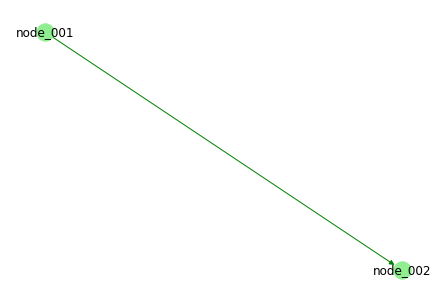

In [551]:
#print edges like two nodes
print([e for e in Gmodel_001.edges])
#change color edge ('node_001', 'node_002')
Gmodel_001.adj['node_001']['node_002']['color'] = 'green'
#change weight of the edge ('node_001', 'node_002')
Gmodel_001.adj['node_001']['node_002']['weight'] = 0.1
#print the infos about edges
print(Gmodel_001.edges.data())
# draw the graph with the nx python module
colors = nx.get_edge_attributes(Gmodel_001,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()
#nx.draw(Gmodel_001, with_labels=True)
nx.draw(Gmodel_001,
        edge_color=colors, 
        width=list(weights),
        with_labels=True,
        node_color='lightgreen')

Let's generate data for this BayesianModel.

Because I have two nodes and a edge, I need two coloms of testing data and a number of choices.



In [552]:

print(np.random.randint(low=0, high=2, size=(4)))
# generate data
data_001 = pd.DataFrame(np.random.randint(low=0, high=2, size=(100, 2)), columns=['node_001', 'node_002'])
print(data_001)


[0 1 1 1]
    node_001  node_002
0          0         1
1          0         1
2          0         1
3          1         0
4          1         0
..       ...       ...
95         1         0
96         0         0
97         0         1
98         1         0
99         0         0

[100 rows x 2 columns]


In [553]:
from pgmpy.estimators import BayesianEstimator
Gmodel_001.fit(data_001, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
for cpd in Gmodel_001.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of node_001:
+-------------+-----+
| node_001(0) | 0.5 |
+-------------+-----+
| node_001(1) | 0.5 |
+-------------+-----+
CPD of node_002:
+-------------+---------------------+---------------------+
| node_001    | node_001(0)         | node_001(1)         |
+-------------+---------------------+---------------------+
| node_002(0) | 0.44285714285714284 | 0.48095238095238096 |
+-------------+---------------------+---------------------+
| node_002(1) | 0.5571428571428572  | 0.5190476190476191  |
+-------------+---------------------+---------------------+


In [554]:
Gmodel_001.get_cpds()[0].name_to_no


{'node_001': {0: 0, 1: 1}}

In [555]:
Gmodel_001.get_cpds()[1].name_to_no

{'node_001': {0: 0, 1: 1}, 'node_002': {0: 0, 1: 1}}

The number of rows of a CPD table and evidence cardinality will specify the columns can be get with **get_cardinality** function.

In [556]:
print(Gmodel_001.get_cpds('node_001'))
print("Number of values Gmodel_001 can take on. The cardinality of Gmodel_001 is:")
print(Gmodel_001.get_cardinality('node_001'))
print(Gmodel_001.get_cpds('node_002'))
print("Number of values Gmodel_002 can take on. The cardinality of Gmodel_002 is:")
print(Gmodel_001.get_cardinality('node_002'))

+-------------+-----+
| node_001(0) | 0.5 |
+-------------+-----+
| node_001(1) | 0.5 |
+-------------+-----+
Number of values Gmodel_001 can take on. The cardinality of Gmodel_001 is:
2
+-------------+---------------------+---------------------+
| node_001    | node_001(0)         | node_001(1)         |
+-------------+---------------------+---------------------+
| node_002(0) | 0.44285714285714284 | 0.48095238095238096 |
+-------------+---------------------+---------------------+
| node_002(1) | 0.5571428571428572  | 0.5190476190476191  |
+-------------+---------------------+---------------------+
Number of values Gmodel_002 can take on. The cardinality of Gmodel_002 is:
2


I can check for various errors.

This method checks for the following errors.


*   checks if the sum of the probabilities for each state is equal to 1;
*   checks if the CPDs ( it’s parametrization (CPDs) doesn’t depend on each other) associated with nodes are consistent with their parents;



In [557]:
print("Passed model check: {}".format(Gmodel_001.check_model()))

Passed model check: True


You can create any type of BayesianModel and add the nodes from any container like: list, set or tuple or the nodes from another graph.

Let's create a graph with list:

In [558]:
from pgmpy.models import BayesianModel
Gmodel_002 = BayesianModel()

my_list = ['list_element_001','list_element_002']
list_size = len(my_list)
# add nodes from my_list
Gmodel_002.add_nodes_from(my_list)
# see the diference with the last sourc code
# Gmodel_001.add_edge('node_001', 'node_002')

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  FutureWarning,


In [559]:
# generate data by a list 
data_002 = pd.DataFrame(np.random.randint(low=0, high=2, size=(100, list_size)), columns=[my_list])
# print data_002
print(data_002)

   list_element_001 list_element_002
0                 0                0
1                 1                1
2                 0                0
3                 1                0
4                 0                0
..              ...              ...
95                0                1
96                1                0
97                0                0
98                0                0
99                1                1

[100 rows x 2 columns]


In [560]:
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5


In [561]:
for cpd in model.get_cpds():
    print(cpd)

+------+-----+
| A(0) | 0.5 |
+------+-----+
| A(1) | 0.5 |
+------+-----+
+------+---------------------+---------------------+
| A    | A(0)                | A(1)                |
+------+---------------------+---------------------+
| B(0) | 0.46190476190476193 | 0.48095238095238096 |
+------+---------------------+---------------------+
| B(1) | 0.5380952380952381  | 0.5190476190476191  |
+------+---------------------+---------------------+
